In [1]:
import ipywidgets as ipw
from IPython.display import display

from stochastic_repro import start_pool
from stochastic_models import biomodels_2004140002
from stochastic_tests import Test

t_fin = 1800.0
num_steps = 1800

test = Test(model=biomodels_2004140002(),
            t_fin=t_fin,
            num_steps=num_steps,
            sample_times=[t_fin / num_steps * i for i in range(1, num_steps + 1)],
            trials=[10, 100, 1000, 10000],
            stochastic=True)

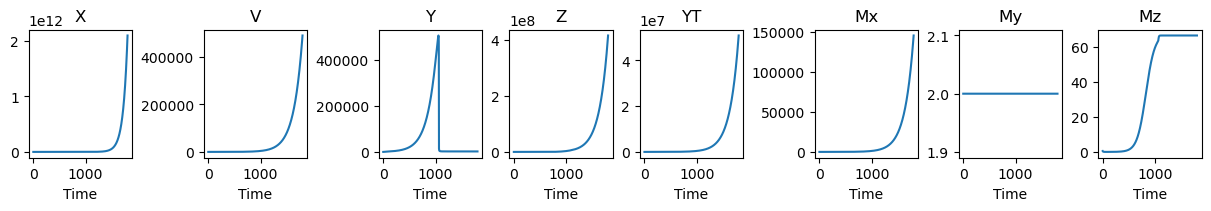

In [2]:
test.execute_deterministic()
_ = test.plot_results_deterministic()

Stochastic simulation results can be treated as a distribution with statistical properties such as mean and standard deviation. Distributions should become smooth with increasing number of trials. 

In [3]:
label, out = ipw.Label(), ipw.Output()
display(out)
with out:
    display(label)

start_pool()
test.execute_stochastic(label)
_ = out.clear_output()

Output()

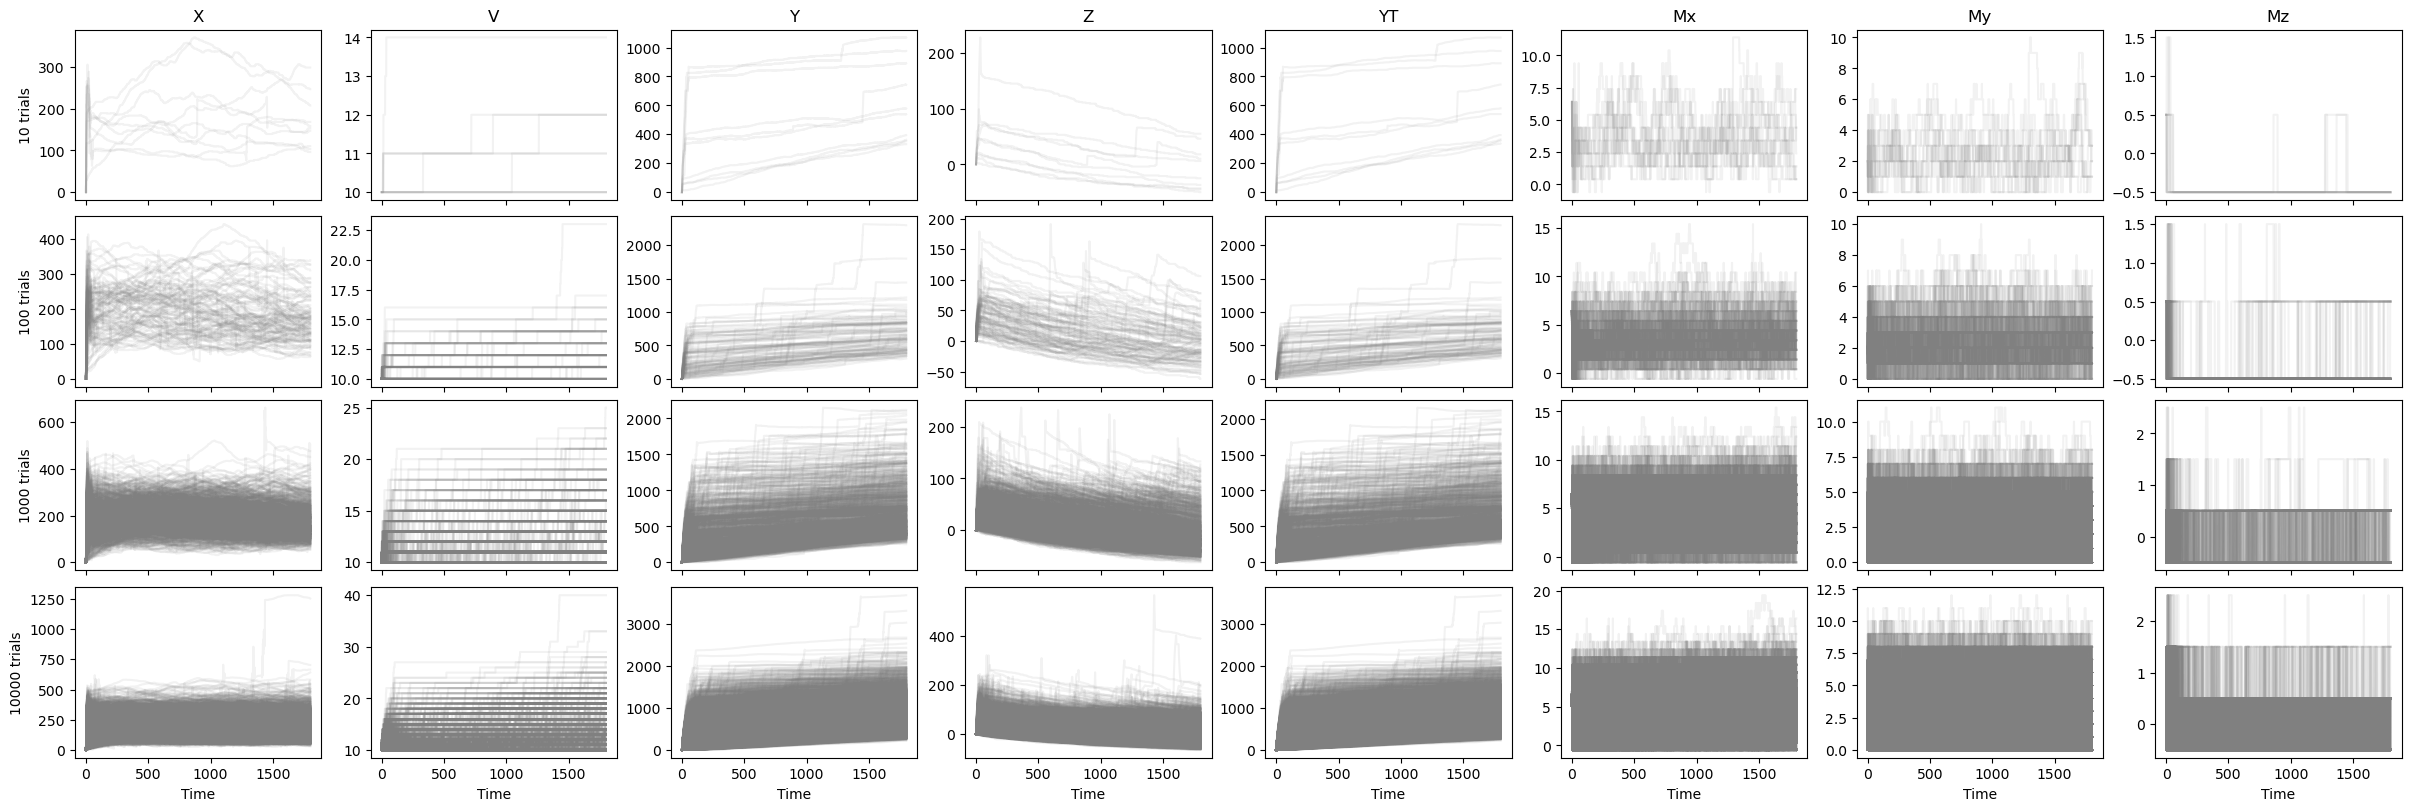

In [4]:
_ = test.plot_results_stochastic(False)

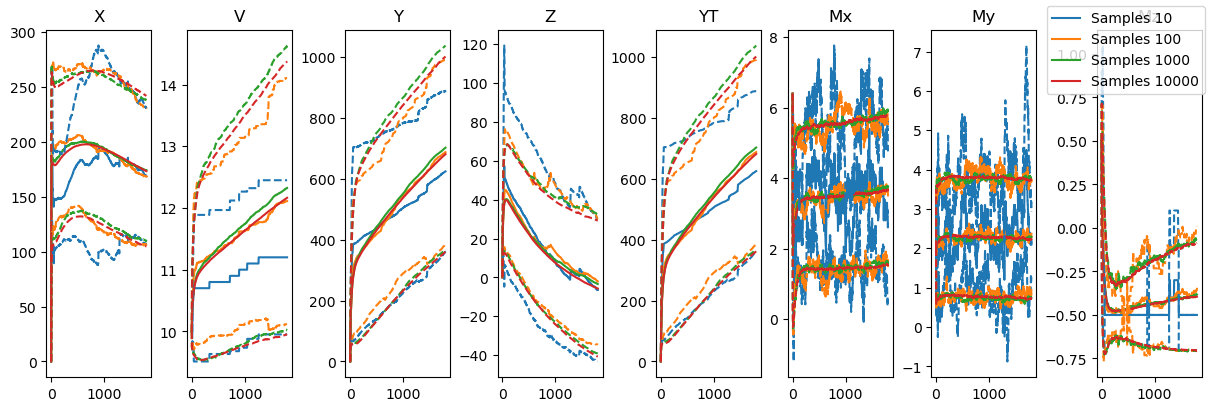

In [5]:
_ = test.plot_stats()

If we bin replicate results at each sample time, we should find that the probability distribution function of a variable at each time point converges with increasing number of replicates. 

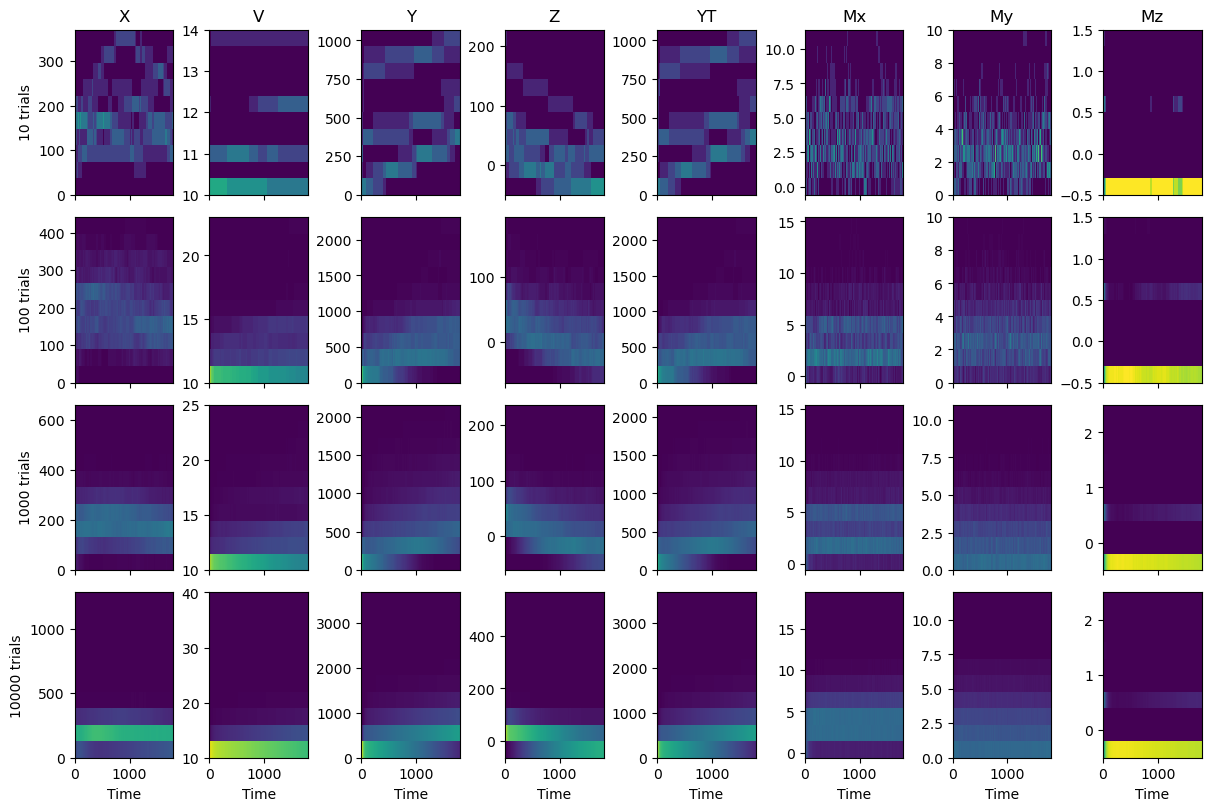

In [6]:
_ = test.plot_distributions()

Results distributions should converge as the number of trials increases. At any sampled simulation time, convergence appears as a distribution that converges with increasing number of trials. Convergence can be quantified by measuring the change in distribution for an increase in number of trials. We should find that the change in distribution goes to zero everywhere as the number of trials increases. 

In [7]:
test.find_ecfs()
test.measure_ecf_diffs()

In [8]:
for t in test.trials:
    ecf_ks_stat_t = {n: -1 for n in test.model.results_names}
    for ks in test.ecf_ks_stat[t]:
        for n, ks_stat in ks.items():
            ecf_ks_stat_t[n] = max(ecf_ks_stat_t[n], ks_stat)
    print(f'{t} trials')
    for n, ks_stat in ecf_ks_stat_t.items():
        print(f'\t{n}: {ks_stat}')

10 trials
	X: 1.7673313759946858
	V: 0.7999473612401461
	Y: 1.704699509024392
	Z: 1.6716534488776778
	YT: 1.6619865048977014
	Mx: 2.0
	My: 2.0
	Mz: 0.8
100 trials
	X: 0.6324329950966309
	V: 0.598832080888514
	Y: 0.5327701419882761
	Z: 0.5989018040407774
	YT: 0.5598885233522294
	Mx: 0.7960427138191847
	My: 0.7192939266698406
	Mz: 0.35999711848765037
1000 trials
	X: 0.2032222085501625
	V: 0.15199020626782012
	Y: 0.19052157871076758
	Z: 0.18860816751443454
	YT: 0.18991132720215964
	Mx: 0.1998922922114083
	My: 0.20083468793070758
	Mz: 0.18799997392370046
10000 trials
	X: 0.06930445402010307
	V: 0.03753332659872335
	Y: 0.04927339068897178
	Z: 0.06614832090771607
	YT: 0.0500740637923848
	Mx: 0.06790564890431008
	My: 0.07099172957253427
	Mz: 0.049994726470720306


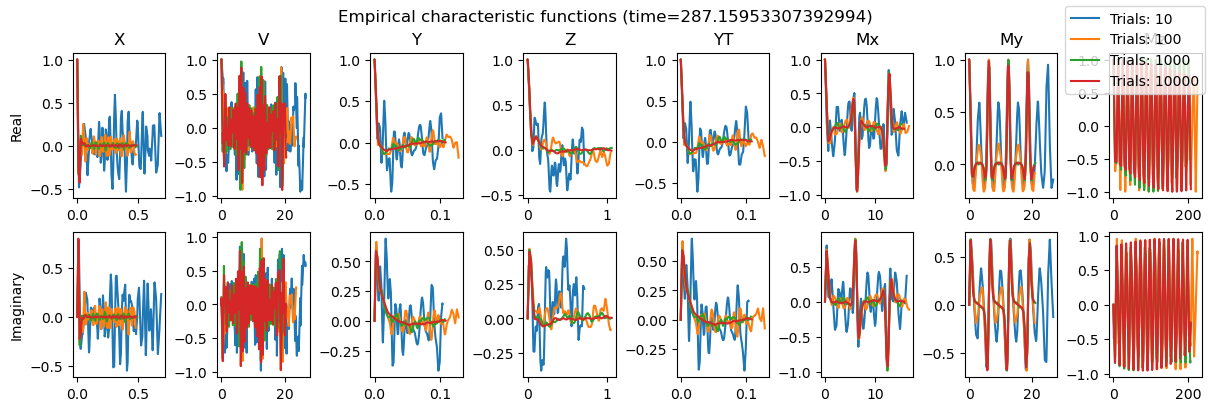

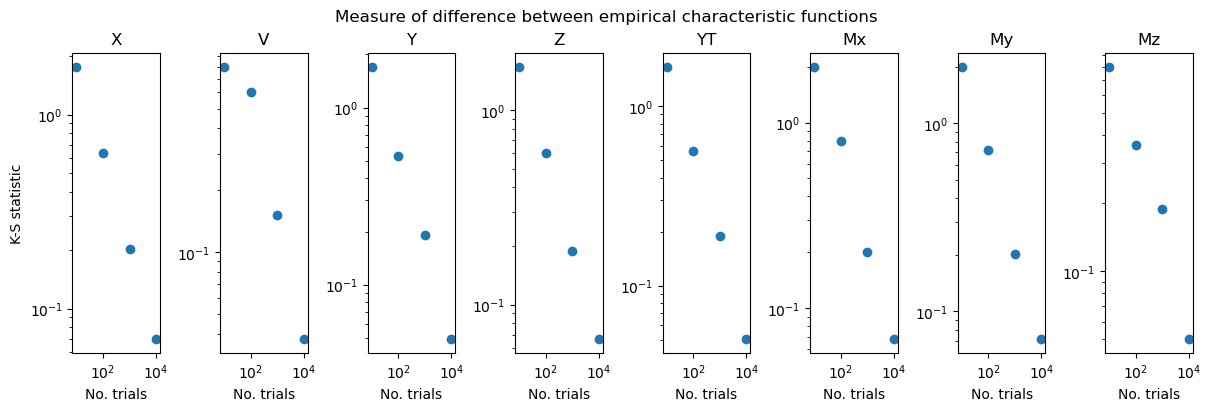

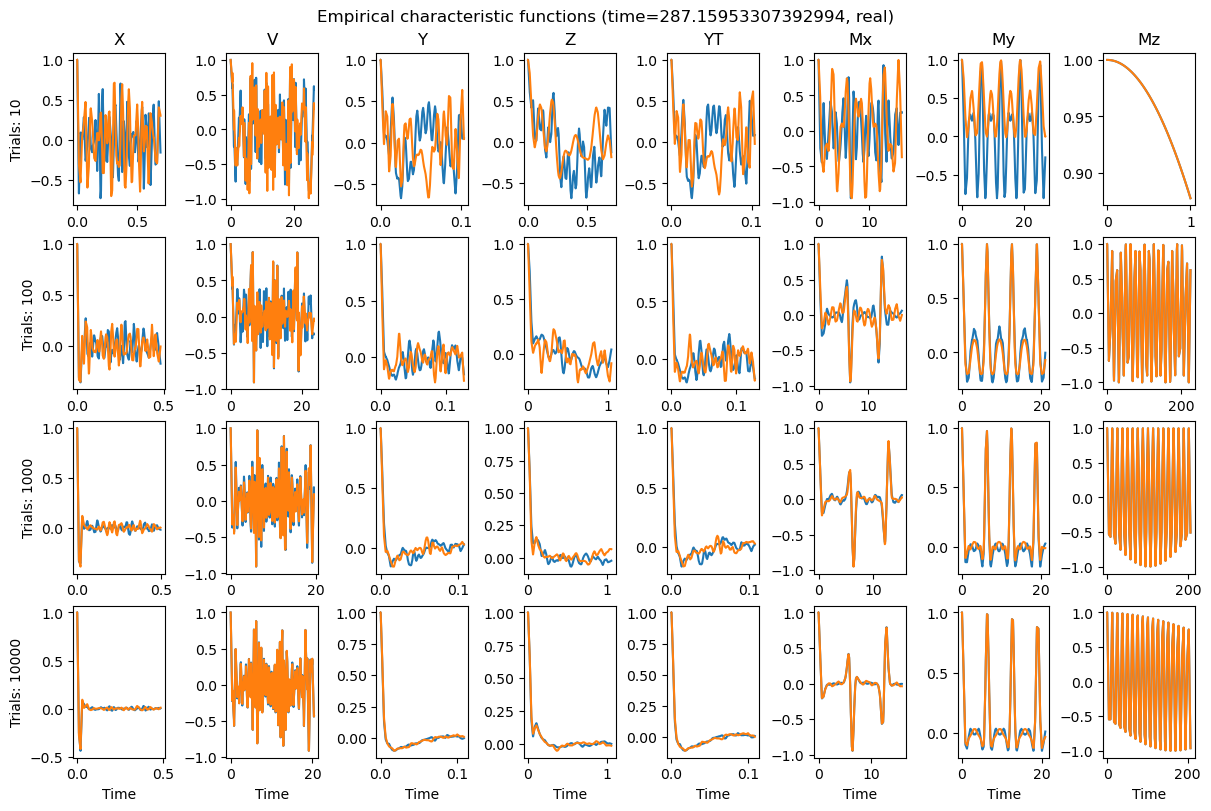

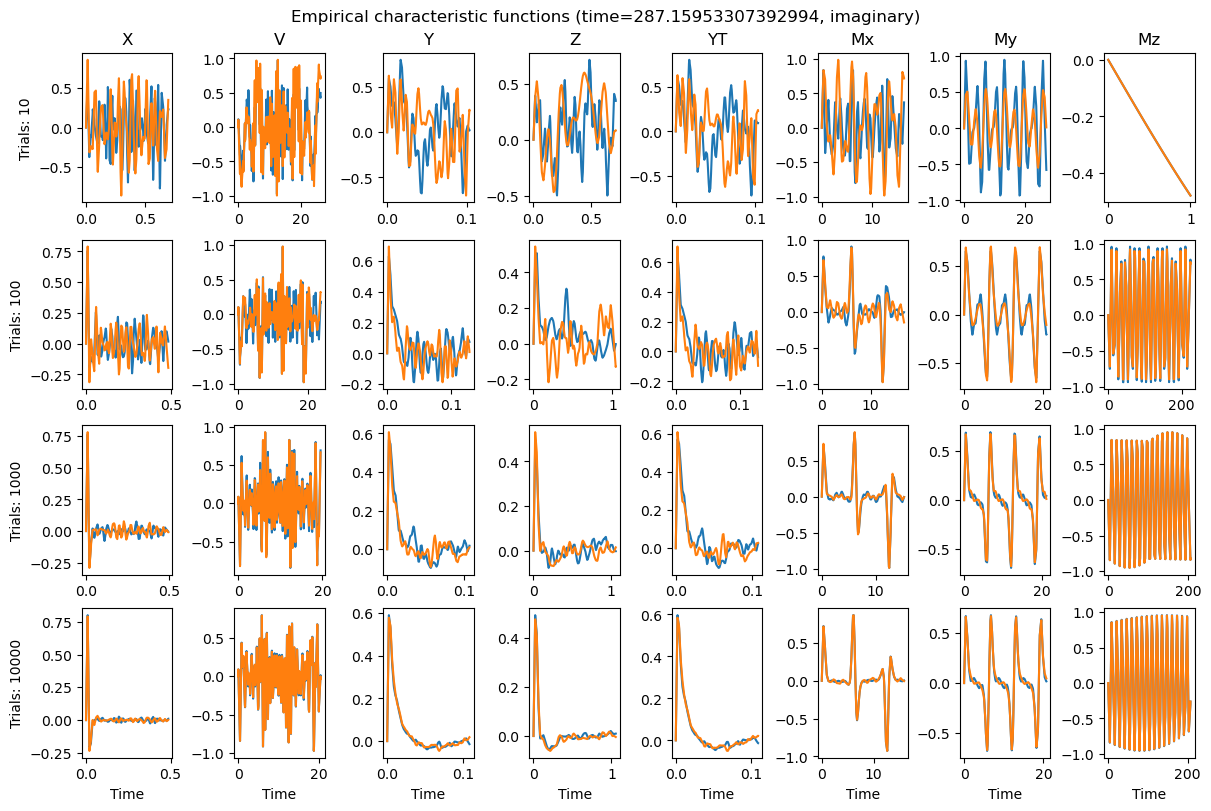

In [9]:
preview_time = test.max_ks_stat_time(test.trials[-1])
# preview_time = test.min_final_eval_time(test.trials[-1])

test.plot_ecf(time=preview_time)
test.plot_ecf_diffs()
_ = test.plot_ecf_comparison(time=preview_time)

In [10]:
test.generate_ecf_diff_fits()

c:\Users\timothy.sego\AppData\Local\miniconda3\envs\stoch_repro\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


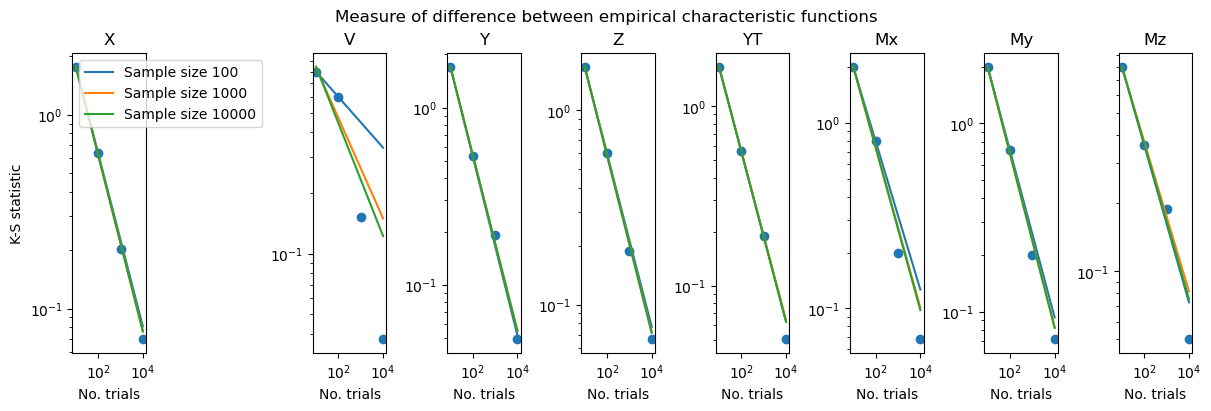

In [11]:
_, axs = test.plot_ecf_diff_fits(test.plot_ecf_diffs())
_ = axs[0].legend()

In [12]:
# Runtime: ~433 minutes (tower)
test.test_sampling(err_thresh=1E-3)

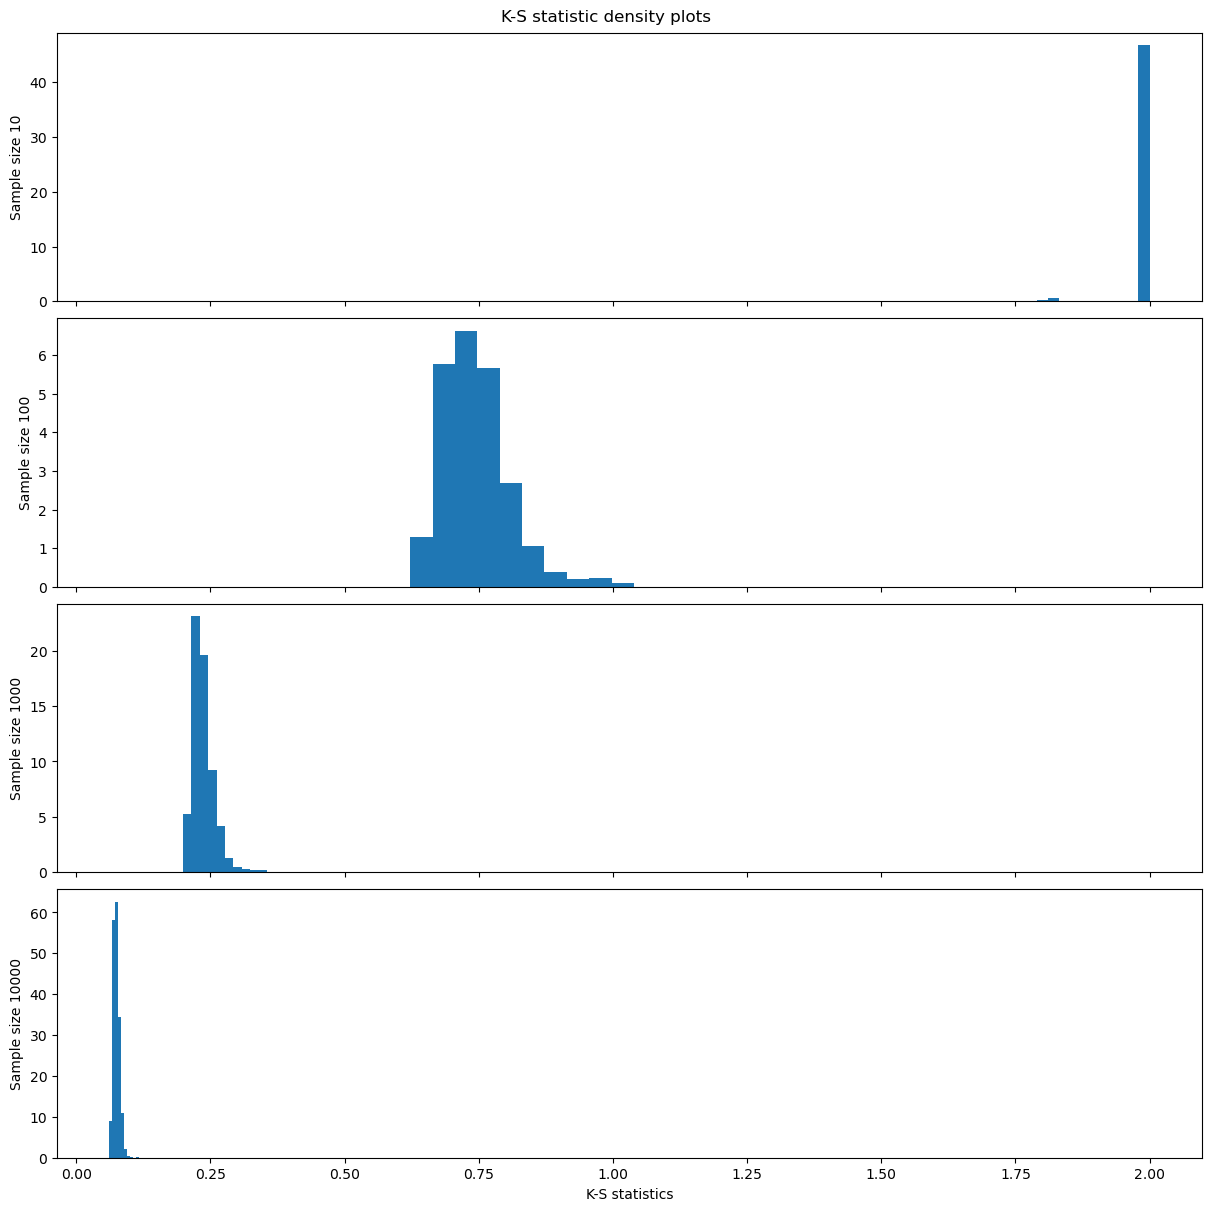

In [13]:
_ = test.plot_ks_sampling()

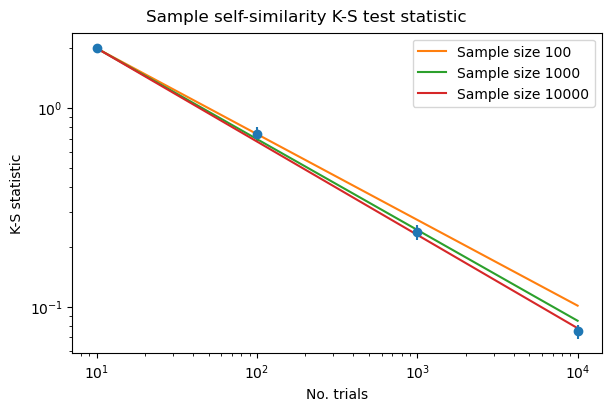

In [14]:
test.generate_ecf_sampling_fits()
_, ax = test.plot_ecf_sampling_fits(test.plot_ecf_sampling())
_ = ax.legend()